In [13]:
# Closure example


In [3]:
def make_averager():
    series = []
    def averager(new_value):
        series.append(new_value)
        total = sum(series)
        return total / len(series)
        
    return averager


In [8]:
avg = make_averager()
avg(10)

10.0

In [9]:
avg(11)

10.5

In [10]:
avg(12)

11.0

where does the avg function in the example find the series?
Note that series is a local variable of make_averager because the assignment series
= [] happens in the body of that function. But when avg(10) is called,
make_averager has already returned, and its local scope is long gone


Within averager, series is a free variable. This is a technical term meaning a variable
that is not bound in the local scope.

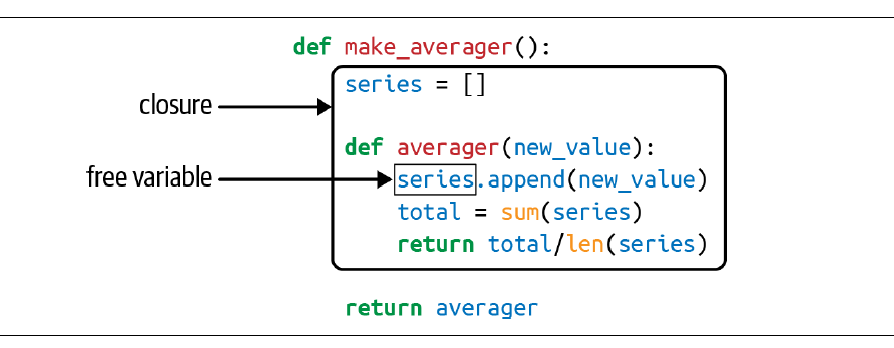

Inspecting the returned averager object shows how Python keeps the names of local
and free variables in the __code__ attribute that represents the compiled body of the
function.

In [16]:
avg.__code__.co_varnames

('new_value', 'total')

In [17]:
avg.__code__.co_freevars

('series',)

The value for series is kept in the __closure__ attribute of the returned function
avg. Each item in avg.__closure__ corresponds to a name in avg. __code__
.co_freevars. These items are cells, and they have an attribute called cell_con
tents where the actual value can be found

In [22]:
avg.__code__.co_freevars

('series',)

In [23]:
avg.__closure__

(<cell at 0x000001ABEE051840: list object at 0x000001ABEE0639C0>,)

In [24]:
avg.__closure__[0].cell_contents

[10, 11, 12]

Example 9-12. A broken higher-order function to calculate a running average without
keeping all history

In [27]:
def make_averager():
    count = 0
    total = 0
    def averager(new_value):
        count += 1
        total += new_value
        return total / count
    return averager

In [28]:
avg = make_averager()

In [29]:
avg(10)

UnboundLocalError: cannot access local variable 'count' where it is not associated with a value

The problem is that the statement count += 1 actually means the same as count =
count + 1 We did not have this problem inthe previous example as series was a list.
To work around this, the nonlocal keyword was introduced in Python 3. It